In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Looking at the complex function $z^z$, $z \in \mathbb{C}$

I'm going to try to visualize the complex function $z^z$, of a complex argument
$z = x + iy = a\,e^{i\varphi}$, where $i^2 = -1$.

Even though Python has excellent native support for complex numbers, it will be
helpful to split $z^z = \mu \, e^{i\psi}$ up into its magnitude, $\mu = \left|\,z^z\,\right|$,
and its phase, $\psi = \arg \left(z^z\right)$:

$$
z^z = \left(\,a\,e^{i\varphi}\,\right)^{x + iy}  
 = a^x\,e^{-\varphi y}\,a^{iy}\,e^{i \varphi x} 
 = \exp \big( (x \ln a - \varphi y) + i \, ( y + \varphi x ) \big).
$$
Therefore,
$$
\mu = \exp (x \ln a - \varphi y)
   \quad \mathrm{and} \quad
\psi = y + \varphi x.
$$

We could express these purely in terms of $a$ and $\varphi$, but for the moment, let's not bother.

## Four dimensions

To plot a complex function with a complex argument, we need a four-dimensional plot. There are different ways of doing this. I'm going to use a three-dimensional figure, putting the real and imaginary parts of the argument, $x$ and $y$, in the plane, and the magnitude of the result, $\mu$, along the vertical. The phase $\psi$ will be represented by a *colour*, where red represents $\psi = 0$ and cyan represents $\psi = \pi$.

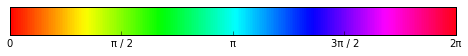

In [2]:
hsv = plt.get_cmap ('hsv')

cbfig = plt.figure(figsize=(8,.5))
cb = mpl.colorbar.ColorbarBase (plt.gca(), cmap=hsv, norm=mpl.colors.Normalize(0, 1),
                                orientation='horizontal')
cb.set_ticks ([0, .25, .5, .75, 1])
cb.set_ticklabels (['0', 'π / 2', 'π', '3π / 2', '2π'])

Now let's set up our variables. I'm plotting the range $-5\lt x \lt 1.5$ and $-1 \le y \le +1$. Above $x \approx 1.5$, the function's value grows increadibly quickly and that's not particularly interesting.

In [3]:
x = np.arange(-5, 1.5, 0.01)
y = np.arange(-1, +1, 0.01)
# make a grid to do the calculation on
X, Y = np.meshgrid(x, y)
# and go into complex space!
Z = X + 1j * Y
# calculate the modulus phase as described above
μ = np.exp(X * np.log(np.abs(Z)) - Y * np.angle(Z))
ψ = Y + np.angle(Z) * X

... and let's make a plot! Note that I'm only plotting the 0th branch of the function, i.e. I'm restricting myself to $0 \le \varphi \lt 2\pi$. I'm also not distinguishing the resulting phases $\psi$ and $\psi + 2n\pi$ in this figure.

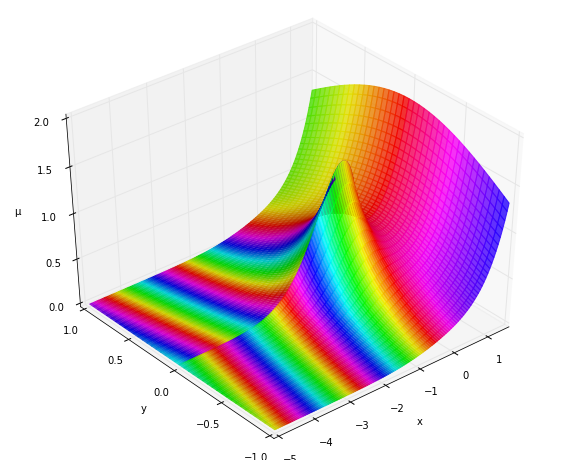

In [4]:
# Set up the colours first. We have to normalize ψ to
# the [0;1] range, "folding down" added multiples of 2π.
ψ_ = ψ / (2 * np.pi)
ψ_folded = ψ_ - np.floor(ψ_)
colours = hsv (ψ_folded) # matplotlib colormap magic!

fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, μ, alpha=0.8, cstride=5, rstride=5, facecolors=colours)
ax1.view_init(elev=40, azim=-130)
ax1.set_xlim(-5, 1.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('μ')

Notice how along the positive x-axis, the surface is coloured red. That means the value is real and positive. That's the function $x^x$, which is real-valued and positive for $x \gt 0$.

The phase also does some other interesting things. It appears to spiral around all over the complex plane! Notably, there are several red ($\psi = 0$, positive real) and cyan ($\psi = \pi$, negative real) stripes going far from the real x-axis. This function has plenty of real values! This isn't that much of a surprise, really: it's a well-known but surprising result that $i^{\,i} \in \mathbb{R}$, for instance. Interestingly enough, while the phase is discontinuous at you cross the negative x-axis, the red and cyan lines line up. Between these, the function appears to be spiralling in opposite directions for positive and negative imaginary components of the argument ($y$).

## Focussing on the real values

So why don't we try to find the points where the function with real values, and just plot those?

In [5]:
# Really, I'm just going to estimate where the real values are.
# This is how precise I'm being.
threshold = .0002
real_positive = (ψ_folded**2 < threshold) | ((1-ψ_folded)**2 < threshold)
real_negative = (0.5-ψ_folded)**2 < threshold
real_pos_xs = X[real_positive].flatten()
real_pos_ys = Y[real_positive].flatten()
real_pos_zs = μ[real_positive].flatten()
real_neg_xs = X[real_negative].flatten()
real_neg_ys = Y[real_negative].flatten()
real_neg_zs = -μ[real_negative].flatten()

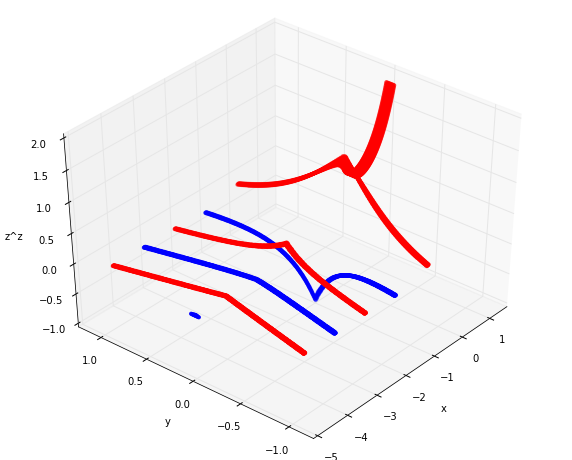

In [6]:
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.scatter (real_pos_xs, real_pos_ys, real_pos_zs, s=10, c='r', edgecolors='face')
ax2.scatter (real_neg_xs, real_neg_ys, real_neg_zs, s=10, c='b', edgecolors='face')

ax2.view_init(elev=40, azim=-140)
ax2.set_xlim(-5, +1.5)
ax2.set_ylim(-1.2, +1.2)
ax2.set_zlim(-1.0, +2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z^z')

What looks like a bit of a smudge near (-5, 0, 0) is simply another line of real points that's cut off as most of it lies outside of the area we're looking at. Notice that we could have expected several of these points to be real anyway: apart from the positive x-axis, there's the y-axis, $z = iy$. It's clear that it has to produce real results as soon as you know that $i^{\,i} \in \mathbb{R}$. Then, there are real values at the negative integers; ${-1}^{-1} = -1$, and so on. 

In [7]:
# save the figures
cbfig.savefig ('z_to_the_z_colorbar.png')
fig1.savefig ('z_to_the_z.png')
fig2.savefig ('z_to_the_z_realbits.png')

![CC-BY](https://i.creativecommons.org/l/by/4.0/88x31.png)

This work is licensed under a [Creative Commons Attribution 4.0 International License][ccby].

[ccby]: http://creativecommons.org/licenses/by/4.0/